In [1]:
import numpy as np
from scipy.stats import dirichlet
import copy
from scipy.special import kl_div
import torch
from scipy.stats import entropy
import scipy.stats as st
import seaborn as sns

In [8]:
def U(xs, alphas):
    fun_U = 0
    for i in range(len(xs)):
        fun_U += (alphas[i] - 1) * np.log(xs[i])
    return -fun_U

# constraint = \sum_i (-x_i 1_{x_i<0}) + (1 - \sum_i x_i) ^ 2
def U_constraint(xs, delta):
    constraints = 0
    sums = np.sum(xs)
    for x in xs:
        if x < 0:
            constraints += np.abs(x)
    constraints += (1-sums) ** 2
    return constraints / delta

def U_gradient(xs, alphas, delta):
    grad = np.zeros(len(xs))
#     calculate constraints
    constraints = U_constraint(xs,delta)
    sums = np.sum(xs)
    for i in range(len(xs)):
        if xs[i]<=0:
            grad[i] -= 1/delta
        else:
            grad[i] += - (alphas[i]-1) * 1/xs[i]
        grad[i] += 2 * (sums - 1) / delta
    return grad

def F_gradient(xs, alphas):
    grad = np.zeros(len(xs))
    for i in range(len(xs)):
        grad[i] += - (alphas[i]-1) * 1/xs[i]
    return grad

In [16]:
from scipy.stats import wasserstein_distance

dim = 3
alphas = [1,2,2]
# number of random variables
N = 1000
x0=[]

for i in range(N):
#     initialized point
    x0.append([0.2, 0.4, 0.4])
    
lr = 0.00008
max_iter = 20000
delta = 0.0004

diri = dirichlet.rvs(alphas, size = N)

dist = []
kl = []
x0 = np.array(x0)

for ite in range(max_iter):
    if ite == 5000:
        lr = lr / 2
    if ite == 10000:
        lr = lr / 2
    if ite == 15000:
        lr = lr / 2
    for i in range(len(x0)):
        rand = np.random.normal(size =(dim) )
        grad = U_gradient(x0[i], alphas, delta)
        x0[i] -= lr * grad + np.sqrt(2*lr) * rand
    tmp_dist = []
    tmp_kl = []
#     calcualte the 2 wasserstein distance for each dimension
    for i in range(dim):
        tmp_dist.append(wasserstein_distance(diri[:,i], x0[:,i]))
        tmp_kl.append(kl_div(diri[:,i], x0[:,i]))
    dist.append(tmp_dist)
    kl.append(tmp_kl)


In [17]:
dist = np.array(dist)
kl = np.array(kl)

In [49]:
diri = dirichlet.rvs(alphas, size = N)

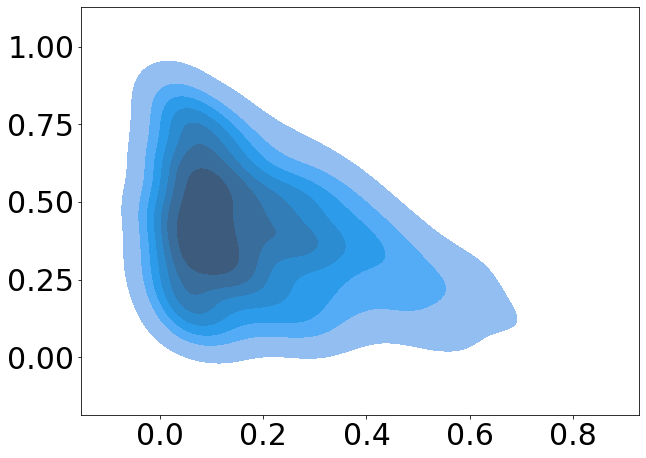

In [50]:
# target distribution density plot
fig=plt.figure(figsize=(10,7.5))
sns.kdeplot(x = diri[:,0], y = diri[:,1], fill = True, levels = 8)
plt.tick_params(labelsize=30)
plt.show()

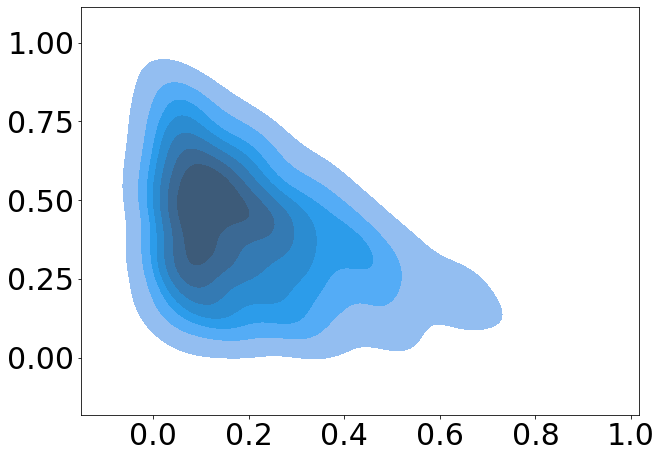

In [26]:
# density plot of PSGLD algorithm
fig=plt.figure(figsize=(10,7.5))
sns.kdeplot(x = x0[:,0], y = x0[:,1], fill = True, levels = 8)
plt.tick_params(labelsize=30)
plt.show()

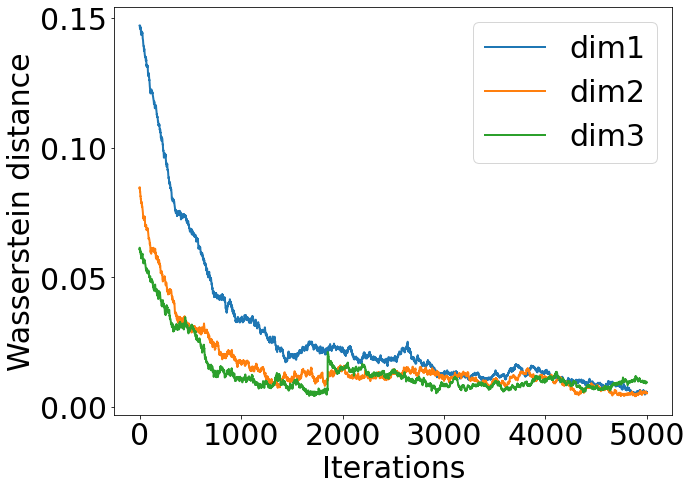

In [76]:
# 2 wasserstein distance plot
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,7.5))
plt.plot(dist[:,0],linewidth=2)
plt.plot(dist[:,1],linewidth=2)
plt.plot(dist[:,2],linewidth=2)
plt.xlabel('Iterations',fontsize=30)
plt.ylabel('Wasserstein distance',fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(['dim1','dim2','dim3'],loc='best',fontsize=30)
plt.show()